In [142]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
sns.set()

# Comment this if the data visualisations doesn't work on your side
%matplotlib inline

plt.style.use('bmh')

## Plots of the results

In [146]:
# feature importance RF, SVM and MLP
df_imp_RF = pd.read_csv("dashboardapp/finaldata/importance_RF.csv")
df_imp_c_RF = pd.read_csv("dashboardapp/finaldata/complete_importance_RF.csv")

df_imp_SVM = pd.read_csv("dashboardapp/finaldata/importance_SVM.csv")
df_imp_c_SVM = pd.read_csv("dashboardapp/finaldata/complete_importance_SVM.csv")

df_imp_MLP = pd.read_csv("dashboardapp/finaldata/importance_MLP.csv")
df_imp_c_MLP = pd.read_csv("dashboardapp/finaldata/complete_importance_MLP.csv")

# model performance RF, SVM and MLP
df_perf_RF = pd.read_csv("dashboardapp/finaldata/performance_RF.csv")
df_perf_SVM = pd.read_csv("dashboardapp/finaldata/performance_SVM.csv")
df_perf_MLP = pd.read_csv("dashboardapp/finaldata/performance_MLP.csv")

# complete original (cleaned) data
df_orig_data = pd.read_csv("ESS8 data/ESS8_subset_cleaned_timeadj_wmissingvals.csv")

In [148]:
df_perf_RF_plt = df_perf_RF.drop('average', axis=1).T
df_perf_RF_plt.columns = df_perf_RF_plt.iloc[0]
df_perf_RF_plt = df_perf_RF_plt.drop(df_perf_RF_plt.index[0])

print(df_perf_RF_plt)

Metric   accuracy balanced accuracy       ROC        F1  Matthews
basinc   0.928181            0.6578    0.6578  0.961637  0.429796
bennent  0.936578          0.536449  0.536449  0.967081   0.22067
bnlwinc  0.942859          0.525881  0.525881  0.970494  0.169933
ccgdbd   0.965456           0.80466   0.80466  0.981566  0.721279
ccrdprs  0.972283          0.803908  0.803908   0.98542  0.717947
...           ...               ...       ...       ...       ...
wrkac6m  0.995631           0.97902   0.97902   0.99762  0.971171
wrkctra   0.98976          0.978341  0.978341  0.993635  0.967619
wrkprbf    0.9247          0.532743  0.532743  0.960659  0.201965
yrbrn2   0.988531          0.974835  0.974835  0.992628  0.967352
yrbrn3   0.990238           0.99141   0.99141  0.988671   0.98027

[74 rows x 5 columns]


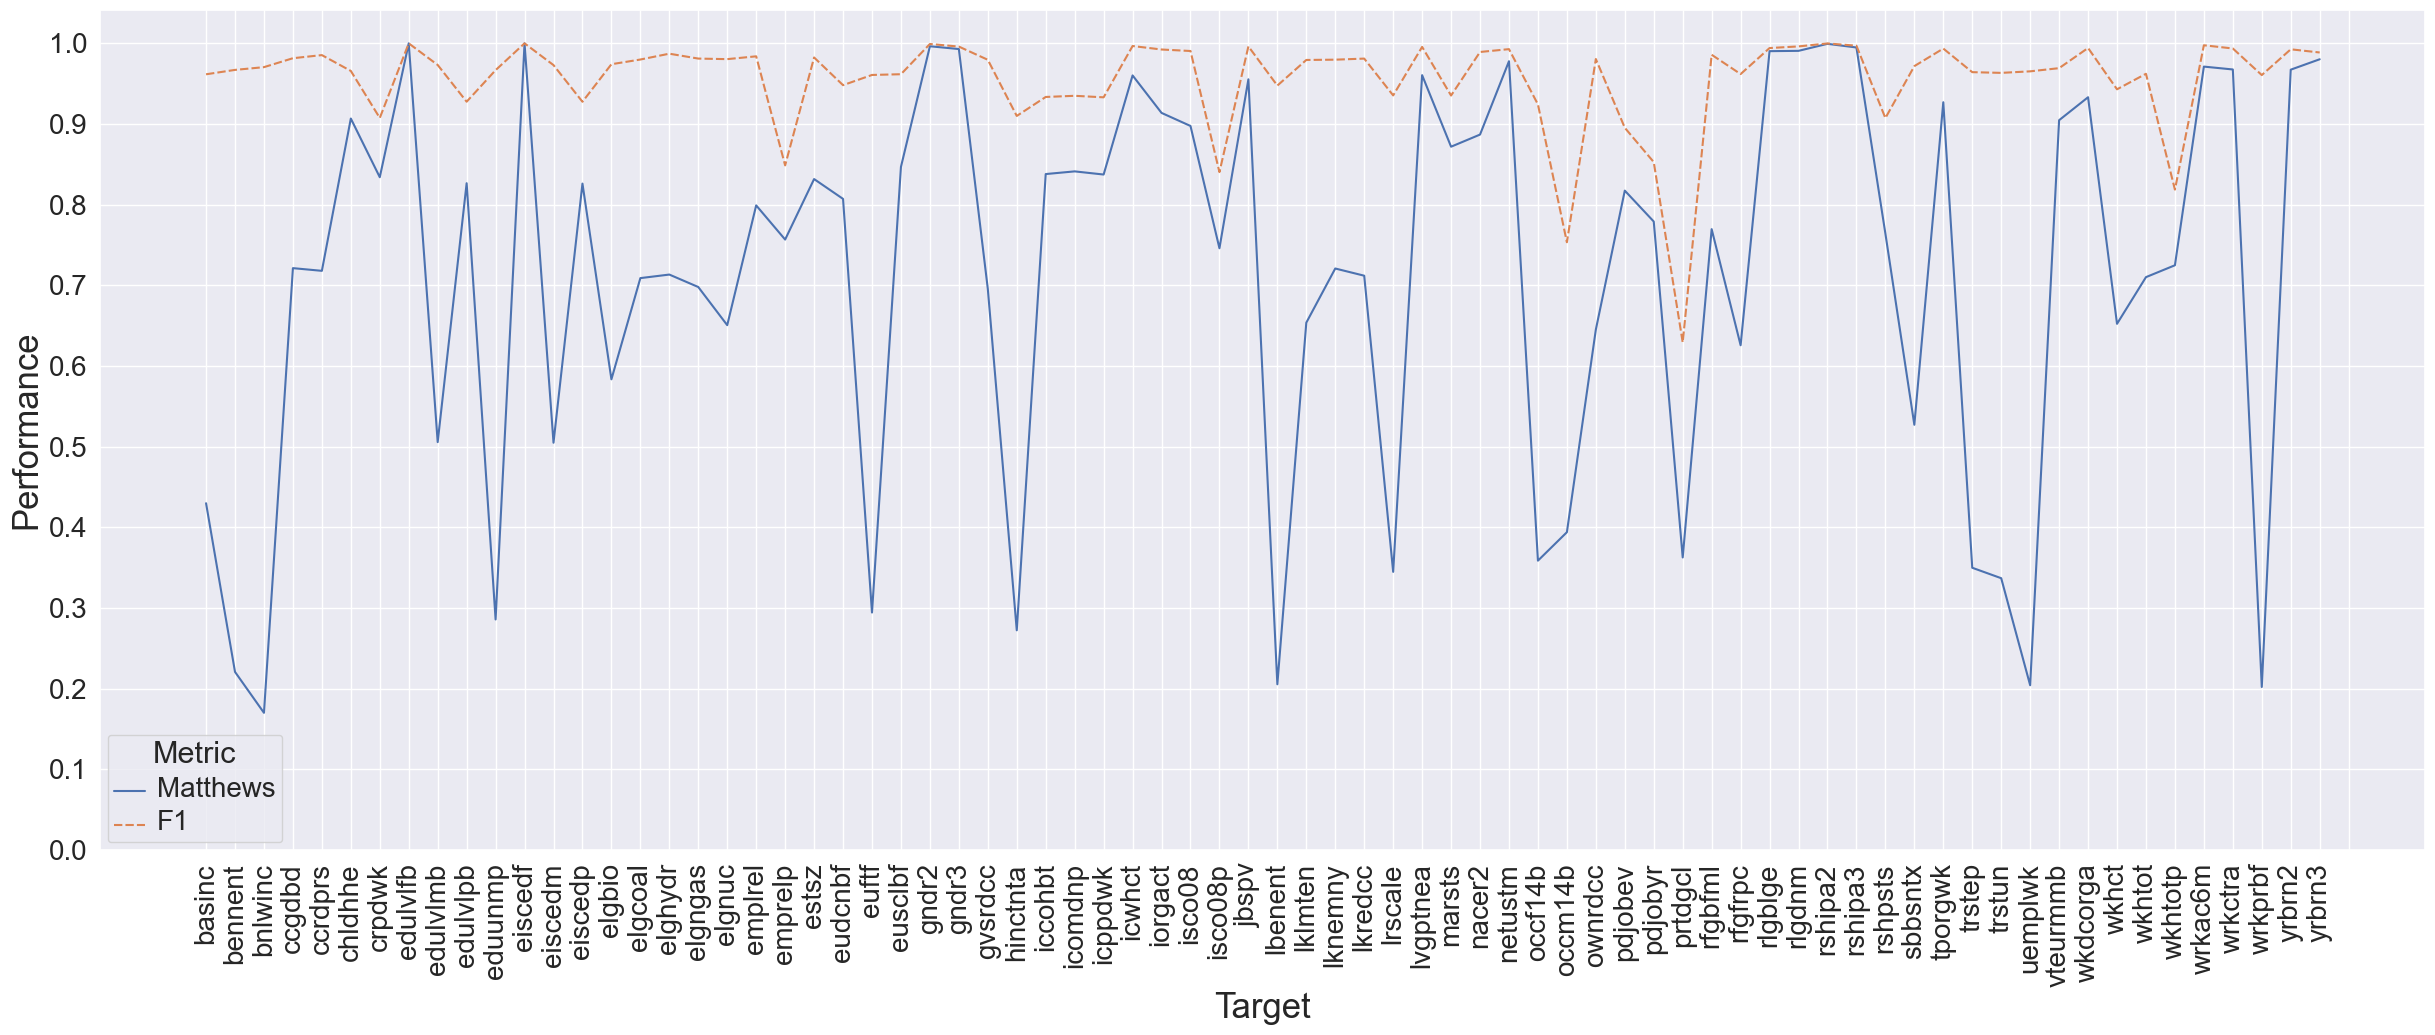

In [225]:
fig, ax = plt.subplots(figsize=(30, 10))
fig.subplots_adjust(top=0.95)
sns.set_color_codes("pastel")
sns.lineplot(df_perf_RF_plt.loc[:, ['Matthews', 'F1']], markers=False, dashes=True)
#fig.suptitle("Performance of best Random Forest model for each of 74 targets", fontsize=18)
ax.set_xlabel("Target", size=25)
ax.set_ylabel("Performance", size=25)
ax.set_xticklabels(df_perf_RF_plt.index)
plt.xticks(np.arange(0, 75, 1), rotation=90, size=20)
plt.yticks(np.arange(0, 1.01, 0.1), size=20)
plt.setp(ax.get_legend().get_texts(), fontsize='20') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='22') # for legend title
plt.savefig('figures/lineplot_performance_best_RF.png', bbox_inches='tight', dpi=300);


In [150]:
# average performance
df_perf_RF[['Metric','average']]

,Metric,average
0,accuracy,0.942773
1,balanced accuracy,0.823230
2,ROC,0.823230
3,F1,0.955296
4,Matthews,0.713094


In [151]:
# count nr models with decent performance
len(df_perf_RF_plt[df_perf_RF_plt['Matthews'] >= 0.695])

50

## Performance SVM

In [152]:
df_perf_SVM_plt = df_perf_SVM.drop('average', axis=1).T
df_perf_SVM_plt.columns = df_perf_SVM_plt.iloc[0]
df_perf_SVM_plt = df_perf_SVM_plt.drop(df_perf_SVM_plt.index[0])
print(df_perf_SVM_plt)

Metric   accuracy balanced accuracy       ROC        F1  Matthews
basinc     0.9176          0.516138  0.516138  0.956904  0.149419
bennent  0.933779          0.502564  0.502564  0.965744  0.069199
bnlwinc  0.941699               0.5       0.5  0.969974       0.0
ccgdbd   0.958424           0.79748   0.79748  0.977744   0.66914
ccrdprs  0.967709          0.756824  0.756824  0.983071  0.659206
...           ...               ...       ...       ...       ...
wrkac6m  0.988326          0.957555  0.957555  0.993637  0.923055
wrkctra  0.984298          0.966005  0.966005  0.990265   0.95018
wrkprbf  0.922105          0.502616  0.502616  0.959457  0.069451
yrbrn2   0.979724          0.958257  0.958257  0.987011  0.941974
yrbrn3   0.975287           0.97412   0.97412  0.970872  0.949446

[74 rows x 5 columns]


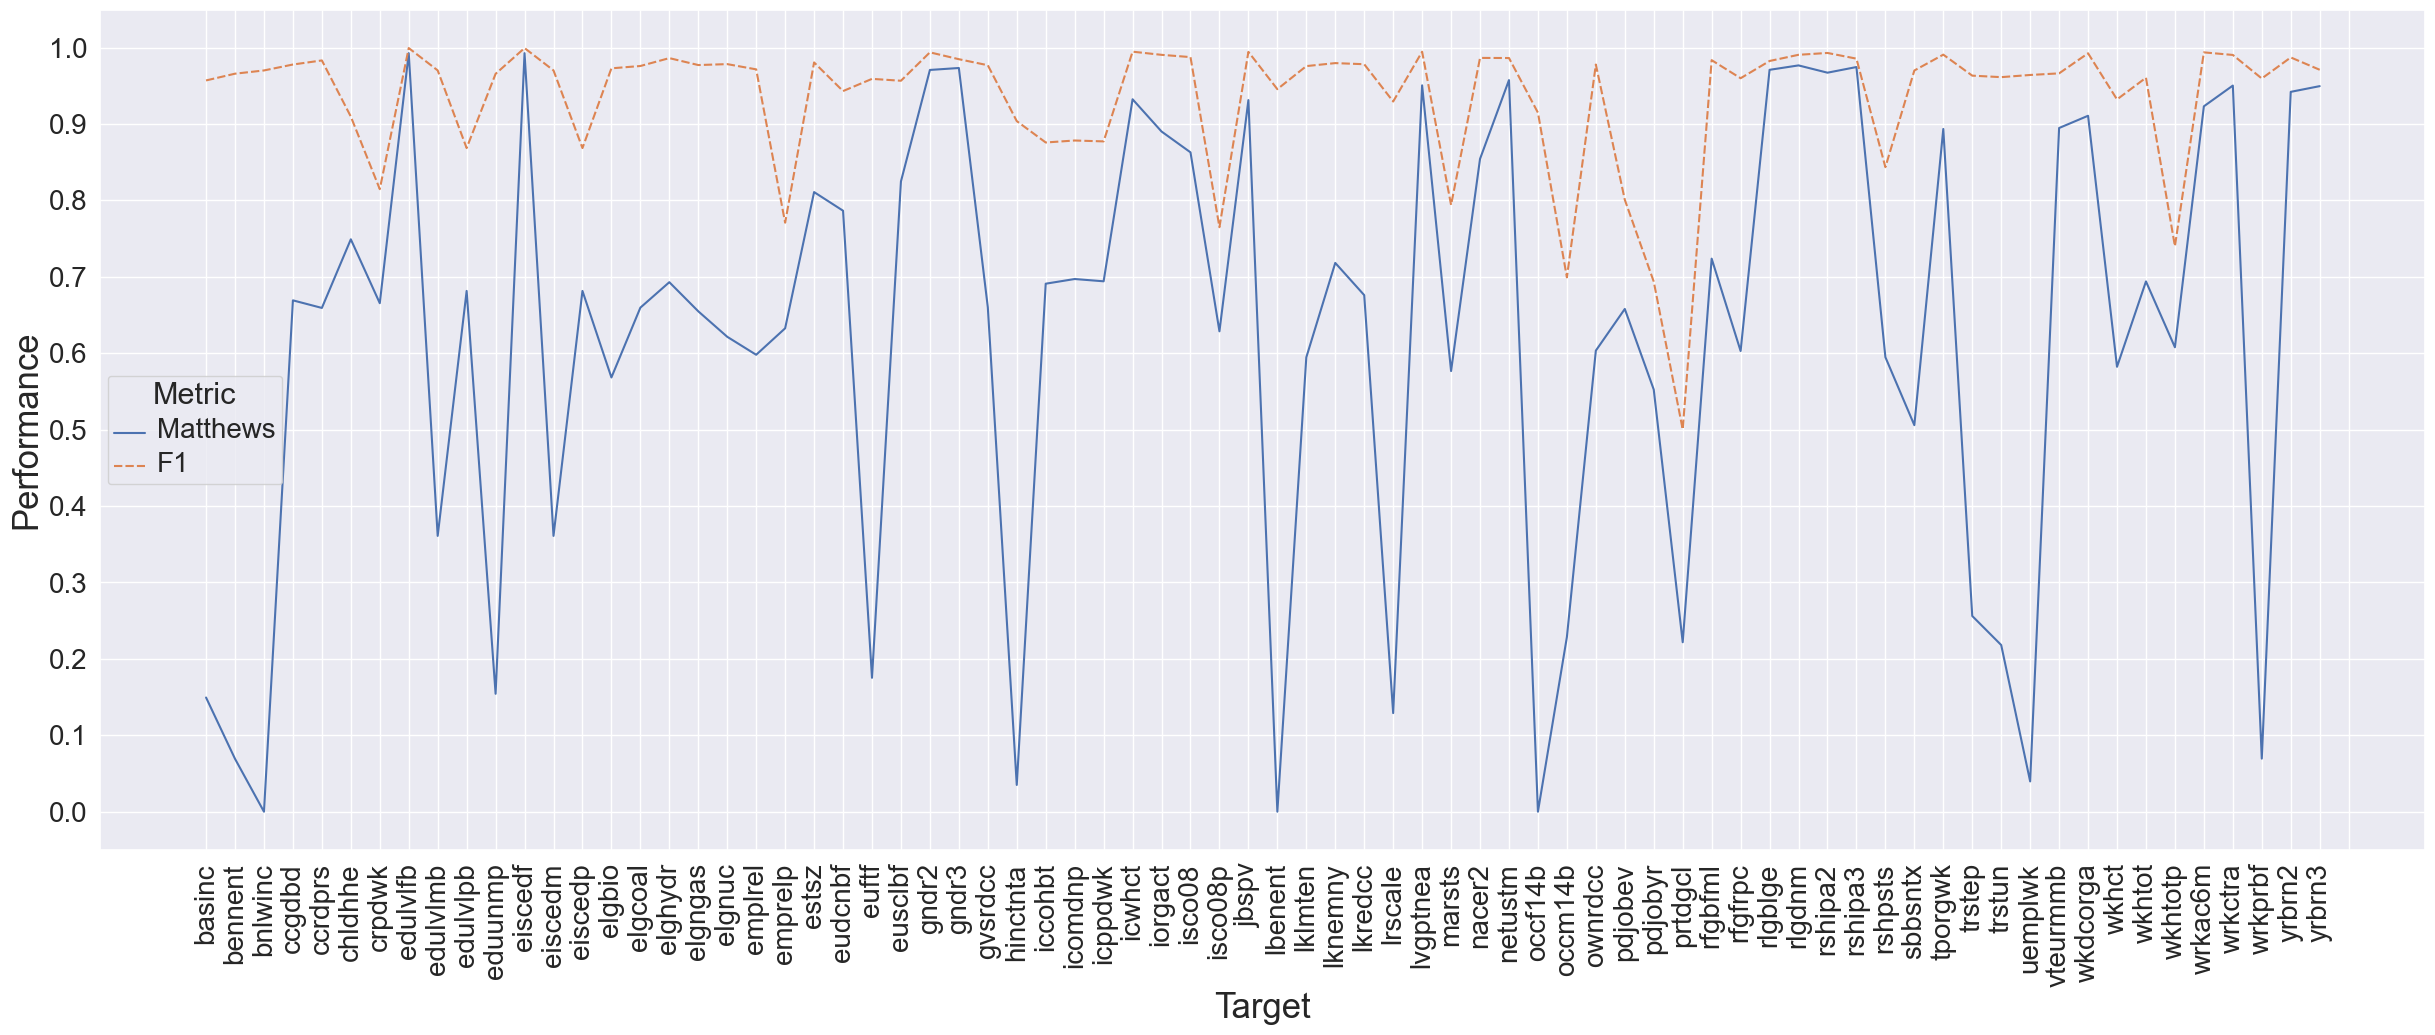

In [224]:
fig, ax = plt.subplots(figsize=(30, 10))
fig.subplots_adjust(top=0.95)
sns.set_color_codes("pastel")
sns.lineplot(df_perf_SVM_plt.loc[:, ['Matthews', 'F1']], markers=False, dashes=True)
#fig.suptitle("Performance of best Random Forest model for each of 74 targets", fontsize=18)
ax.set_xlabel("Target", size=25)
ax.set_ylabel("Performance", size=25)
ax.set_xticklabels(df_perf_SVM_plt.index)
plt.xticks(np.arange(0, 75, 1), rotation=90, size=20)
plt.yticks(np.arange(0, 1.01, 0.1), size=20)
plt.setp(ax.get_legend().get_texts(), fontsize='20') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='22') # for legend title
plt.savefig('figures/lineplot_performance_best_SVM.png', bbox_inches='tight', dpi=300);

In [154]:
# average performance
df_perf_SVM[['Metric','average']]

,Metric,average
0,accuracy,0.921476
1,balanced accuracy,0.783694
2,ROC,0.783694
3,F1,0.934405
4,Matthews,0.623555


In [155]:
# find targets with near-zero Matthews coefficient
df_perf_SVM_plt[df_perf_SVM_plt['Matthews'] <0.1]

Metric,accuracy,balanced accuracy,ROC,F1,Matthews
bennent,0.933779,0.502564,0.502564,0.965744,0.069199
bnlwinc,0.941699,0.5,0.5,0.969974,0.0
hinctnta,0.824413,0.501611,0.501611,0.903685,0.035007
lbenent,0.896573,0.5,0.5,0.945466,0.0
occf14b,0.842845,0.5,0.5,0.914722,0.0
uemplwk,0.930639,0.501822,0.501822,0.964063,0.039622
wrkprbf,0.922105,0.502616,0.502616,0.959457,0.069451


In [156]:
# count nr models with decent performance
len(df_perf_SVM_plt[df_perf_SVM_plt['Matthews'] >= 0.695])

29

## Performance MLP

In [157]:
df_perf_MLP_plt = df_perf_MLP.drop('average', axis=1).T
df_perf_MLP_plt.columns = df_perf_MLP_plt.iloc[0]
df_perf_MLP_plt = df_perf_MLP_plt.drop(df_perf_MLP_plt.index[0])
print(df_perf_MLP_plt)

Metric   accuracy balanced accuracy       ROC        F1  Matthews
basinc    0.91562               0.5       0.5  0.955952       0.0
bennent  0.933438               0.5       0.5  0.965573       0.0
bnlwinc  0.941699               0.5       0.5  0.969974       0.0
ccgdbd    0.96293          0.807522  0.807522  0.980177   0.70358
ccrdprs  0.969006          0.767987  0.767987   0.98374  0.675703
...           ...               ...       ...       ...       ...
wrkac6m  0.995631           0.97902   0.97902   0.99762  0.971171
wrkctra  0.989487          0.979336  0.979336   0.99346  0.966771
wrkprbf  0.921696               0.5       0.5  0.959253       0.0
yrbrn2   0.988258          0.974658  0.974658  0.992451  0.966551
yrbrn3   0.989214          0.990497  0.990497  0.987496  0.978222

[74 rows x 5 columns]


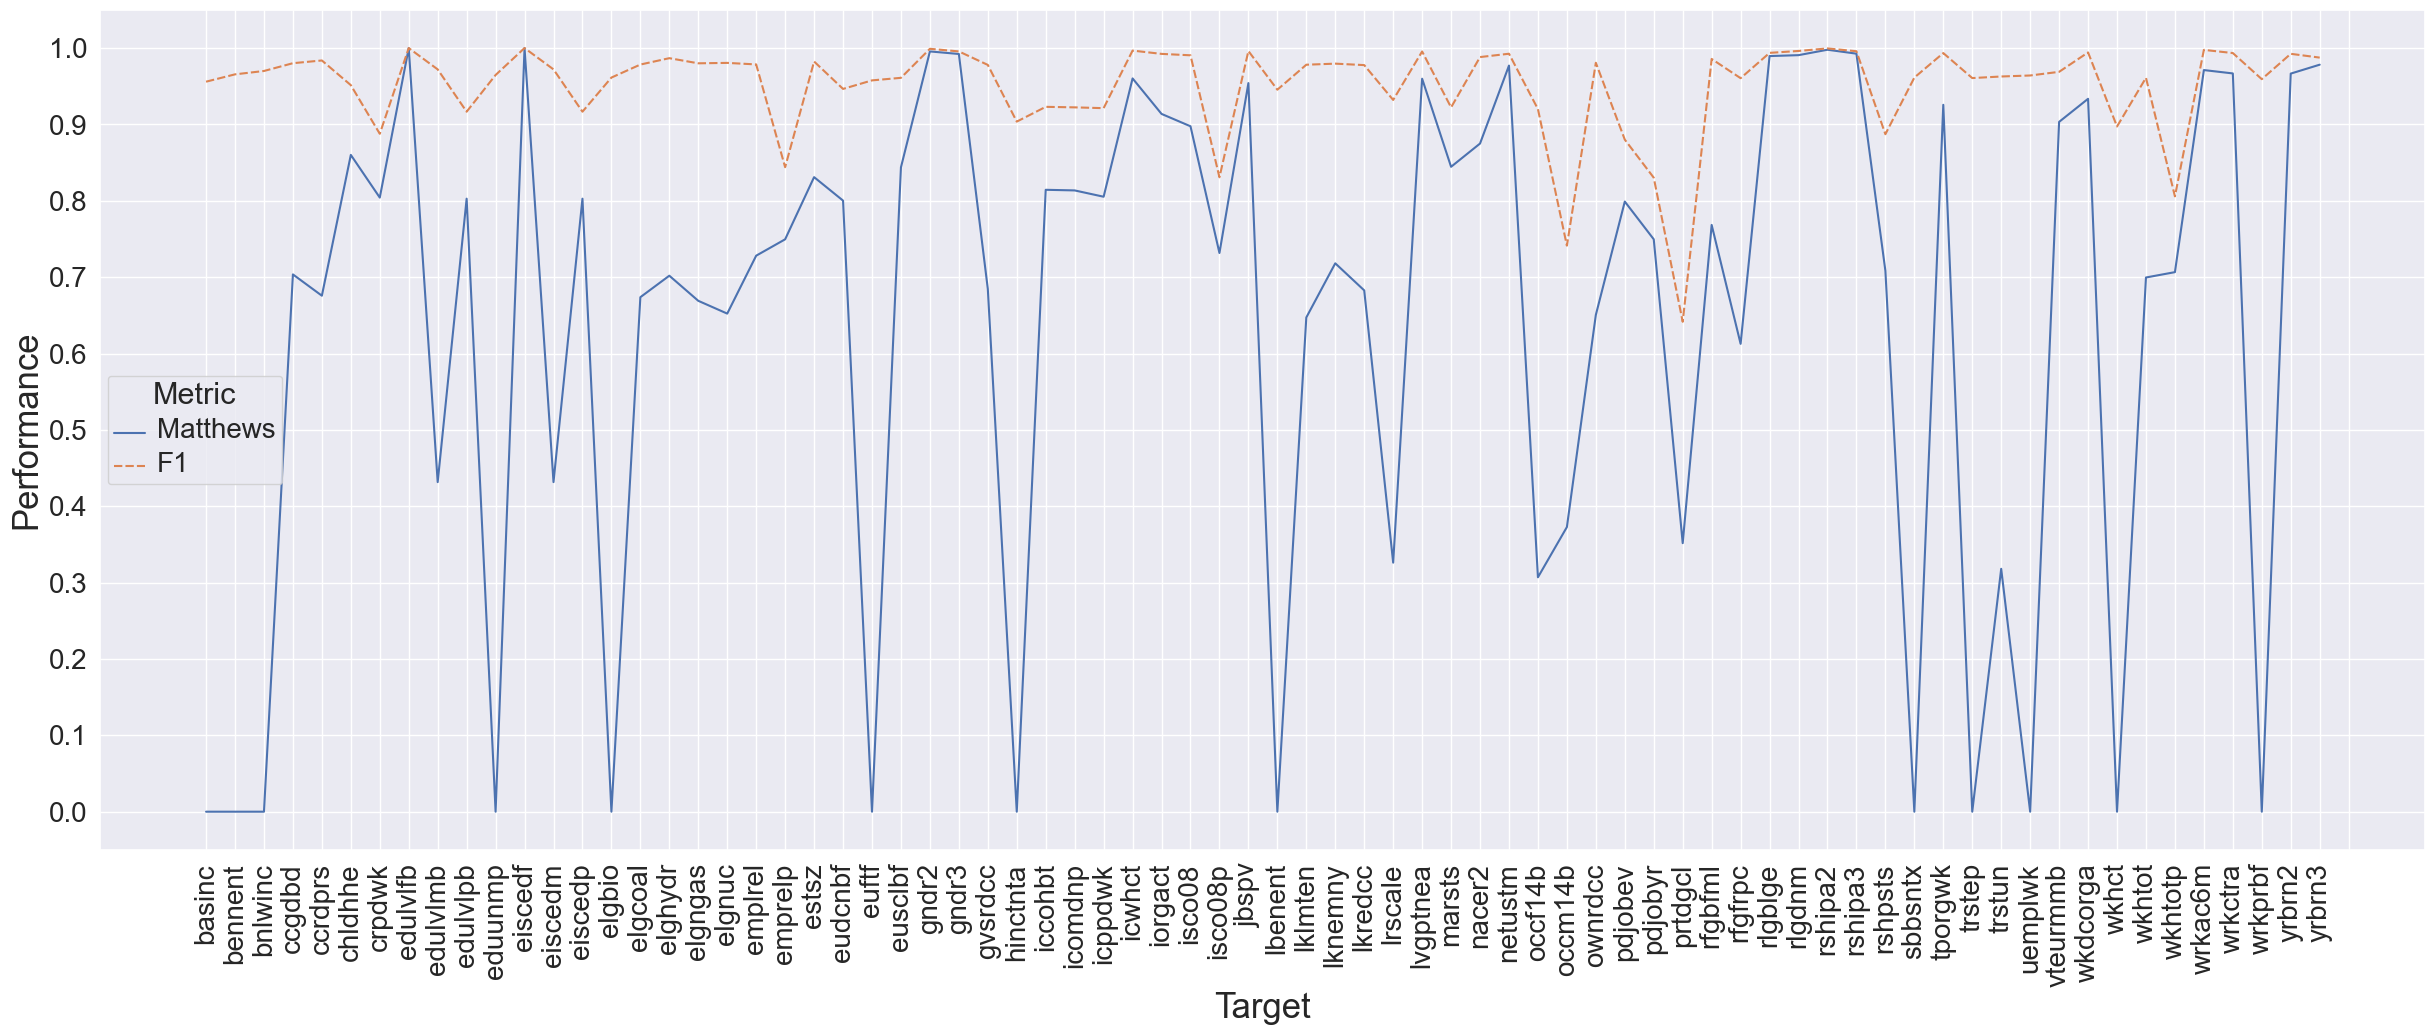

In [223]:
fig, ax = plt.subplots(figsize=(30, 10))
fig.subplots_adjust(top=0.95)
sns.set_color_codes("pastel")
sns.lineplot(df_perf_MLP_plt.loc[:, ['Matthews', 'F1']], markers=False, dashes=True)
#fig.suptitle("Performance of best Random Forest model for each of 74 targets", fontsize=18)
ax.set_xlabel("Target", size=25)
ax.set_ylabel("Performance", size=25)
ax.set_xticklabels(df_perf_MLP_plt.index)
plt.xticks(np.arange(0, 75, 1), rotation=90, size=20)
plt.yticks(np.arange(0, 1.01, 0.1), size=20)
plt.setp(ax.get_legend().get_texts(), fontsize='20') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='22') # for legend title
plt.savefig('figures/lineplot_performance_best_MLP.png', bbox_inches='tight', dpi=300);

In [159]:
# average performance
df_perf_MLP[['Metric','average']]

,Metric,average
0,accuracy,0.936518
1,balanced accuracy,0.799117
2,ROC,0.799117
3,F1,0.950910
4,Matthews,0.640747


In [160]:
# extract targets with near-zero Matthews coefficient
df_perf_MLP_plt[df_perf_MLP_plt['Matthews'] <0.1]

Metric,accuracy,balanced accuracy,ROC,F1,Matthews
basinc,0.91562,0.5,0.5,0.955952,0.0
bennent,0.933438,0.5,0.5,0.965573,0.0
bnlwinc,0.941699,0.5,0.5,0.969974,0.0
eduunmp,0.931868,0.5,0.5,0.964732,0.0
elgbio,0.925587,0.5,0.5,0.961356,0.0
euftf,0.91876,0.5,0.5,0.95766,0.0
hinctnta,0.824276,0.5,0.5,0.903675,0.0
lbenent,0.896573,0.5,0.5,0.945466,0.0
sbbsntx,0.925519,0.5,0.5,0.961319,0.0
trstep,0.924358,0.5,0.5,0.960692,0.0


In [161]:
# count nr models with decent performance
len(df_perf_MLP_plt[df_perf_MLP_plt['Matthews'] >= 0.695])

45

## Feature importance RF (WIP)

In [162]:
# de-clustered complete data
print(df_imp_c_RF[['Feature', 'average']].nlargest(5, 'average'))

      Feature   average
201    region  0.038476
202   regunit  0.038476
8    psppsgva  0.037041
200   rfgbfml  0.036879
237     pdwrk  0.035060


Percentages missing for top 5:

region: 0.00%

regunit: 0%

psppsgva: 2.16%

rfgbfml: 6.73%

pdwrk: 0%

In [163]:
# clustered, 'incomplete' (raw) results (do not use this, not informative)
df_imp_RF = df_imp_RF.reset_index(drop=True)
df_imp_RF.mean(axis=0).nlargest(5)

/var/folders/hz/w8lmx83s7ks9bykdf41f9n_r0000gn/T/ipykernel_89787/4187629509.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_imp_RF.mean(axis=0).nlargest(5)


Unnamed: 0    95.000000
lvgptnea       0.013009
eusclbf        0.010354
eudcnbf        0.010314
marsts         0.010041
dtype: float64

In [164]:
# # two examples of feature importance
# df_importance_RF_rlgblge = pd.read_csv('feature importance/RF/ft_importancesSHAP_RF_rlgblge.csv')
# df_importance_RF_ccrdprs = pd.read_csv('feature importance/RF/ft_importancesSHAP_RF_ccrdprs.csv')
#
# df_importance_RF_rlgblge = df_importance_RF_rlgblge.rename(columns={'Unnamed: 0':'feature'})
# # df_importance_RF_rlgblge = df_importance_RF_rlgblge[['0']]
#
# df_importance_RF_ccrdprs = df_importance_RF_ccrdprs.rename(columns={'Unnamed: 0':'feature'})
# # df_importance_RF_ccrdprs = df_importance_RF_ccrdprs[['0']]
#

#'ESS8 data/ESS8_subset_cleaned_timeadj_wmissingvals.csv', low_memory=False

In [165]:
# fig, ax = plt.subplots(figsize=(6, 15))
# fig.subplots_adjust(top=0.95)
# sns.set_color_codes("pastel")
# sns.barplot(x='0', y='feature', data=df_importance_RF_rlgblge)
# fig.suptitle("Feature importance of data with 'ever belonging to a religion' feature as target", fontsize=12)
# ax.set_xlabel('SHAP feature importance')
# plt.savefig('figures/RF_rlgblge_barplotfeatimp.png', bbox_inches='tight', dpi=300);


In [166]:
# fig, ax = plt.subplots(figsize=(6, 15))
# fig.subplots_adjust(top=0.95)
# sns.set_color_codes("pastel")
# sns.barplot(x='0', y='feature', data=df_importance_RF_ccrdprs)
# fig.suptitle("Feature importance of data with 'feel personal responsibility to reduce climate change' feature as target", fontsize=12)
# ax.set_xlabel('SHAP feature importance')
# plt.savefig('figures/RF_ccrdprs_barplotfeatimp.png', bbox_inches='tight', dpi=300);
#

In [167]:
# maybe also make list with targets in all 3 good model sets and compare feat imp
targ_good_RF = df_perf_RF_plt[df_perf_RF_plt['Matthews'] >= 0.695].index.tolist()
df_imp_c_RF_good = df_imp_c_RF[['Feature', *targ_good_RF]]
df_imp_c_RF_good['average'] = df_imp_c_RF_good.mean(axis=1)
df_imp_c_RF_good[['Feature', 'average']].nlargest(10, 'average')

/var/folders/hz/w8lmx83s7ks9bykdf41f9n_r0000gn/T/ipykernel_89787/1646724199.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_imp_c_RF_good['average'] = df_imp_c_RF_good.mean(axis=1)
/var/folders/hz/w8lmx83s7ks9bykdf41f9n_r0000gn/T/ipykernel_89787/1646724199.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_imp_c_RF_good['average'] = df_imp_c_RF_good.mean(axis=1)


,Feature,average
237,pdwrk,0.049425
246,eiscedf,0.047818
93,eisced,0.046810
239,domicil,0.046675
235,icpart2,0.044800
245,wkhtotp,0.044010
236,eduyrs,0.043989
247,edulvlb,0.043956
116,uemplap,0.043175
201,region,0.042458


## Feature importance SVM

In [168]:
print(df_imp_c_SVM[['Feature', 'average']].nlargest(5, 'average'))


      Feature   average
78   dvrcdeva  0.034060
45     yrbrn2  0.033931
147   rshpsts  0.032918
93     eisced  0.029379
239   domicil  0.029183


Percentages missing for top 5:

dvrcdeva: 0.59%

yrbrn2: 22.96%

rshpsts: 41.68%

eisced: 0.29%

domicil: 0.11%

In [169]:
# maybe also make list with targets in all 3 good model sets and compare feat imp
targ_good_SVM = df_perf_SVM_plt[df_perf_SVM_plt['Matthews'] >= 0.695].index.tolist()
df_imp_c_SVM_good = df_imp_c_SVM[['Feature', *targ_good_SVM]]
df_imp_c_SVM_good['average'] = df_imp_c_SVM_good.mean(axis=1)
df_imp_c_SVM_good[['Feature', 'average']].nlargest(10, 'average')

/var/folders/hz/w8lmx83s7ks9bykdf41f9n_r0000gn/T/ipykernel_89787/4168714558.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_imp_c_SVM_good['average'] = df_imp_c_SVM_good.mean(axis=1)
/var/folders/hz/w8lmx83s7ks9bykdf41f9n_r0000gn/T/ipykernel_89787/4168714558.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_imp_c_SVM_good['average'] = df_imp_c_SVM_good.mean(axis=1)


,Feature,average
237,pdwrk,0.058843
45,yrbrn2,0.058196
78,dvrcdeva,0.053114
236,eduyrs,0.046795
235,icpart2,0.042733
77,lvgptnea,0.039128
115,yrbrn3,0.037944
93,eisced,0.035234
247,edulvlb,0.035234
146,dscrrce,0.035024


## Feature importance MLP

In [170]:
print(df_imp_c_MLP[['Feature', 'average']].nlargest(5, 'average'))

      Feature   average
246   eiscedf  0.041033
78   dvrcdeva  0.039511
45     yrbrn2  0.039022
245   wkhtotp  0.038109
116   uemplap  0.037612


Percentages missing for top 5:

eiscedf: 10.07%

dvrcdeva: 0.59%

yrbrn2: 22.96%

wkhtotp: 67.25%

uemplap: 0%

In [171]:
# maybe also make list with targets in all 3 good model sets and compare feat imp
targ_good_MLP = df_perf_MLP_plt[df_perf_MLP_plt['Matthews'] >= 0.695].index.tolist()
df_imp_c_MLP_good = df_imp_c_MLP[['Feature', *targ_good_MLP]]
df_imp_c_MLP_good['average'] = df_imp_c_MLP_good.mean(axis=1)
df_imp_c_MLP_good[['Feature', 'average']].nlargest(10, 'average')




/var/folders/hz/w8lmx83s7ks9bykdf41f9n_r0000gn/T/ipykernel_89787/1043948134.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_imp_c_MLP_good['average'] = df_imp_c_MLP_good.mean(axis=1)
/var/folders/hz/w8lmx83s7ks9bykdf41f9n_r0000gn/T/ipykernel_89787/1043948134.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_imp_c_MLP_good['average'] = df_imp_c_MLP_good.mean(axis=1)


,Feature,average
246,eiscedf,0.067966
78,dvrcdeva,0.064837
45,yrbrn2,0.064640
245,wkhtotp,0.063088
116,uemplap,0.061741
239,domicil,0.060861
93,eisced,0.060555
149,pdwrkp,0.057596
241,edctnp,0.057596
247,edulvlb,0.055815


Subset of good targets present in all 3 models

In [172]:
set_RF = set(targ_good_RF)
set_SVM = set(targ_good_SVM)
set_MLP = set(targ_good_MLP)

targ_good = [e for e in set_RF if e in set_SVM and e in set_MLP]
len(targ_good)

29

In [173]:
# df_perf_RF_plt.loc[targ_good]
missing_cols = df_orig_data.columns[df_orig_data.isnull().any()].to_list()
percent_missing = df_orig_data[missing_cols].isnull().sum() * 100 / len(df_orig_data)
missing_info = pd.DataFrame({'column name':missing_cols,
                             'percentage missing':percent_missing})

missing_info_sorted = missing_info.sort_values('percentage missing', inplace=False, ascending=False)
missing_info_sorted

,column name,percentage missing
wkhtotp,wkhtotp,67.253926
pdjobyr,pdjobyr,66.156758
isco08p,isco08p,64.489603
emprelp,emprelp,63.719107
rlgblge,rlgblge,59.817064
...,...,...
icomdng,icomdng,0.027035
icpdwrk,icpdwrk,0.024782
chldhm,chldhm,0.024782
gndr,gndr,0.020276


In [174]:
missing_info_sub = missing_info_sorted[missing_info_sorted['column name'].isin(targ_good)]
missing_info_sub

,column name,percentage missing
rlgblge,rlgblge,59.817064
yrbrn3,yrbrn3,57.208192
gndr3,gndr3,56.446707
rshipa3,rshipa3,56.406155
icomdnp,icomdnp,41.649582
rlgdnm,rlgdnm,41.147183
chldhhe,chldhhe,35.147678
vteurmmb,vteurmmb,33.385901
netustm,netustm,32.158064
eudcnbf,eudcnbf,28.438507


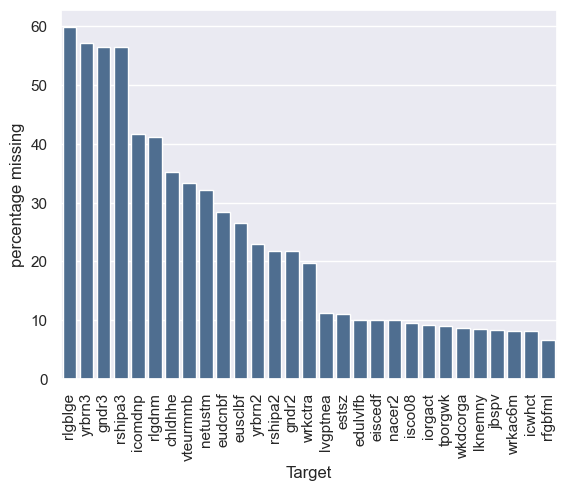

In [175]:
import seaborn as sns
sns.set()

ax = sns.barplot(data=missing_info_sub, x='column name', y='percentage missing',
             #stat='count', bins=20,
             color='#446e9b')

plt.xticks(rotation=90)
ax.set(xlabel='Target')

fig = ax.get_figure()
fig.savefig('figures/barplot_missingness_commontargs.png', dpi=300, bbox_inches='tight')

In [176]:
df_imp_c_RF_good_sub = df_imp_c_MLP[['Feature', *targ_good]]
df_imp_c_RF_good_sub.loc[:,'average'] = df_imp_c_RF_good_sub.mean(axis=1)
# df_imp_c_RF_good_sub[['Feature', 'average']].nlargest(10, 'average')

df_imp_c_SVM_good_sub = df_imp_c_SVM[['Feature', *targ_good]]
df_imp_c_SVM_good_sub.loc[:,'average'] = df_imp_c_SVM_good_sub.mean(axis=1)
# df_imp_c_MLP_good_sub[['Feature', 'average']].nlargest(10, 'average')

df_imp_c_MLP_good_sub = df_imp_c_MLP[['Feature', *targ_good]]
df_imp_c_MLP_good_sub.loc[:,'average'] = df_imp_c_MLP_good_sub.mean(axis=1)
# df_imp_c_MLP_good_sub[['Feature', 'average']].nlargest(10, 'average')

/var/folders/hz/w8lmx83s7ks9bykdf41f9n_r0000gn/T/ipykernel_89787/1892548705.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_imp_c_RF_good_sub.loc[:,'average'] = df_imp_c_RF_good_sub.mean(axis=1)
/var/folders/hz/w8lmx83s7ks9bykdf41f9n_r0000gn/T/ipykernel_89787/1892548705.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_imp_c_RF_good_sub.loc[:,'average'] = df_imp_c_RF_good_sub.mean(axis=1)
/var/folders/hz/w8lmx83s7ks9bykdf41f9n_r0000gn/T/ipykernel_89787/1892548705.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is de

In [179]:
lst_RF = df_imp_c_RF_good_sub['average']
lst_SVM = df_imp_c_SVM_good_sub['average']
lst_MLP = df_imp_c_MLP_good_sub['average']

data = np.array([lst_RF, lst_SVM, lst_MLP]).T

df_good_sub = pd.DataFrame(data, columns = ['average RF', 'average SVM', 'average MLP'], index=df_imp_c_RF['Feature'])
df_good_sub.sort_values(by='average MLP', ascending=False)


,average RF,average SVM,average MLP
Feature,,,
yrbrn2,0.064954,0.058196,0.064954
pdwrk,0.063756,0.058843,0.063756
dvrcdeva,0.055812,0.053114,0.055812
eduyrs,0.054149,0.046795,0.054149
icpart2,0.047088,0.042733,0.047088
...,...,...,...
dngdk,0.000000,0.000000,0.000000
dngothp,0.000000,0.000000,0.000000
crpdwk,0.000000,0.000000,0.000000


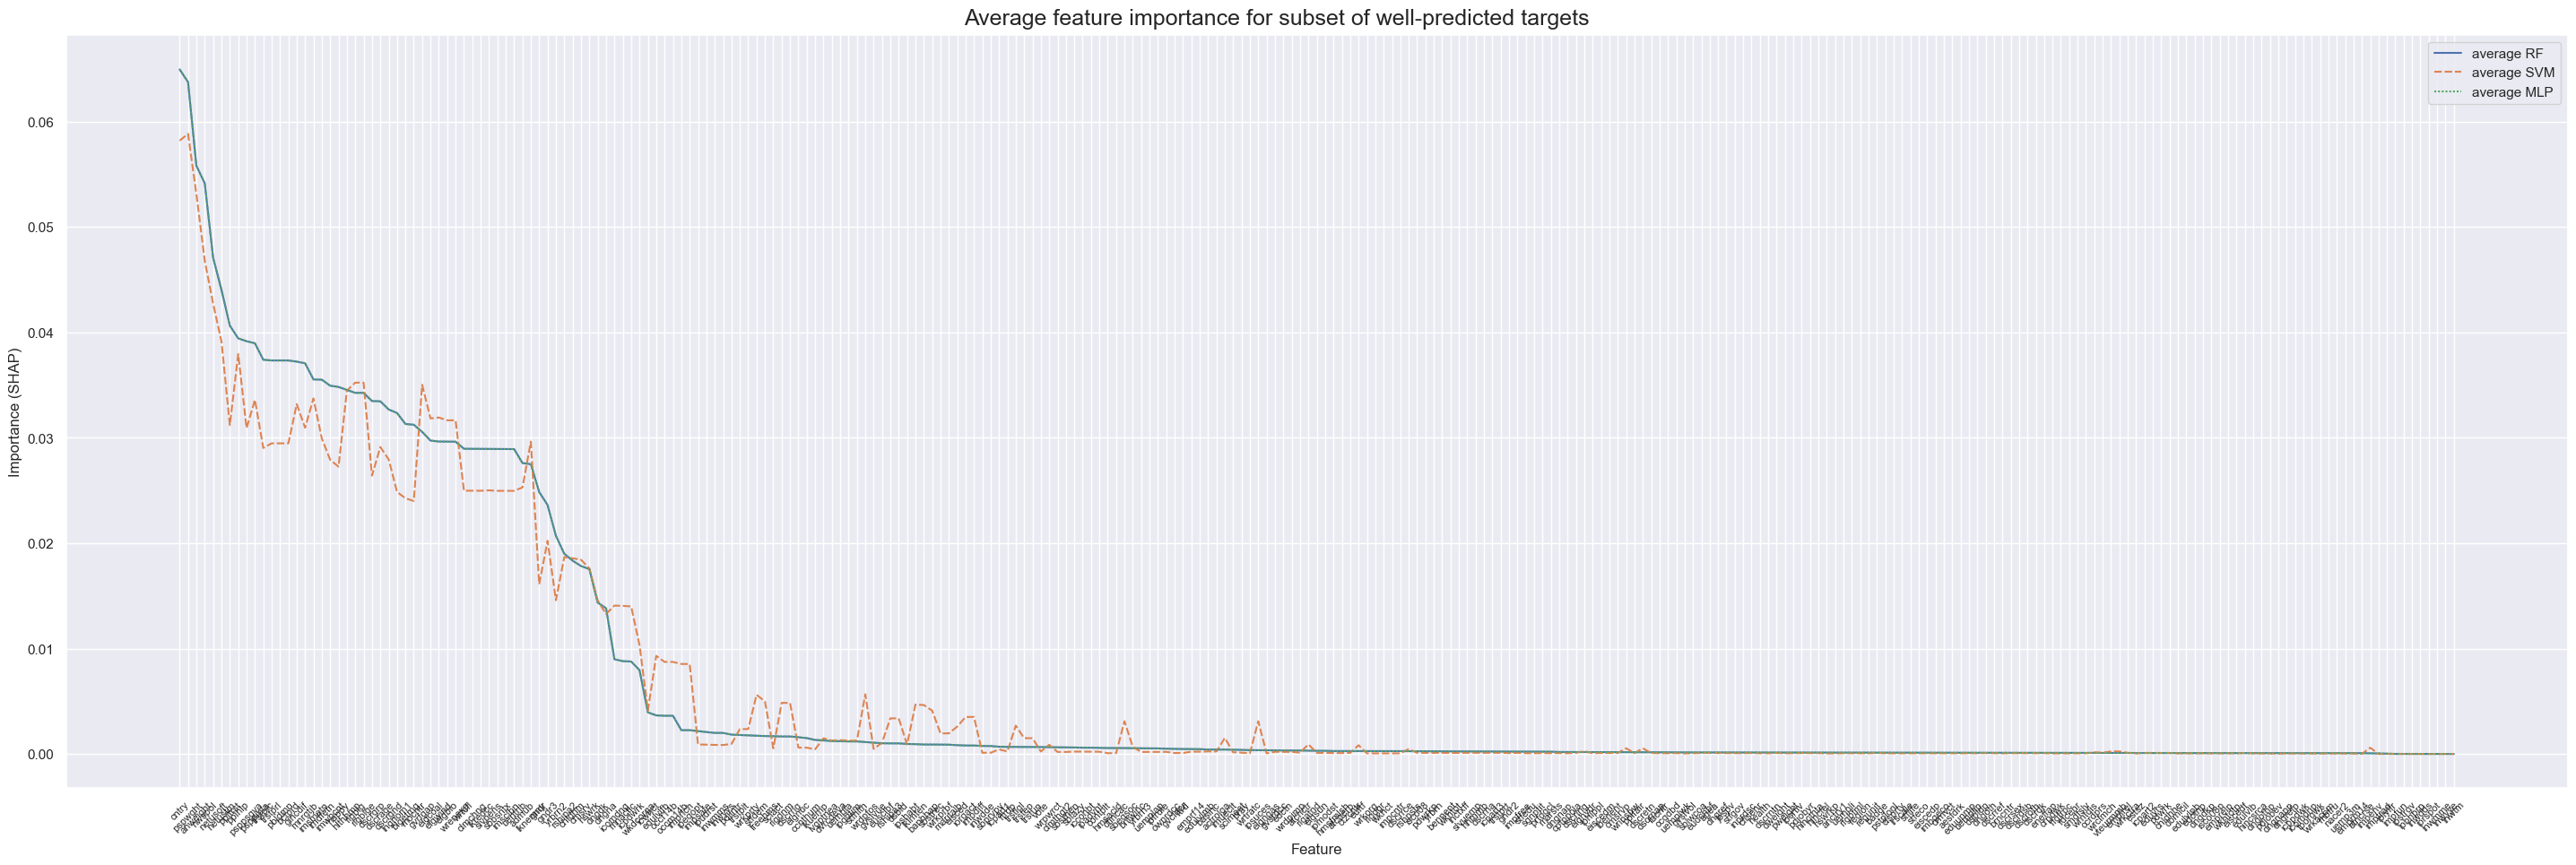

In [185]:
fig, ax = plt.subplots(figsize=(36, 10))
fig.subplots_adjust(top=0.95)
sns.set_color_codes("pastel")
sns.lineplot(df_good_sub.sort_values(by='average MLP', ascending=False), markers=False, dashes=True)
fig.suptitle("Average feature importance for subset of well-predicted targets", fontsize=18)
ax.set_xlabel("Feature")
ax.set_ylabel("Importance (SHAP)")
ax.set_xticklabels(df_good_sub.index)
plt.xticks(rotation=45, size=8) #np.arange(-1, 75, 0.99),
plt.yticks(size=11) #np.arange(0, 1.01, 0.1),
plt.savefig('figures/lineplot_importance_subset.png', bbox_inches='tight', dpi=300);


## MCAR test stuff
(remove this)
A p-value for the $\chi^2$-statistic below 0.05 is considered representing a dependent association. Moreover, a Cramer's coefficient between 0.3 and 0.5 is considered representing a moderate association and above 0.5 a high association.
To determine whether the missingness of each target follows an MAR mechanism, the complete cases are separated from the incomplete ones and it is analyzed whether the conclusion drawn from the p-value is different in the two possible cases.

In [189]:
df_mar_test = pd.read_csv('missing_data_info/mcar_test.csv')
df_mar_test.rename({'Unnamed: 0':'Feature pair'}, axis=1, inplace=True)
df_mar_test

,Feature pair,Cramer complete cases,P-value complete cases,Cramer incomplete cases,P-value incomplete cases
0,"('netusoft', 'ppltrst')",0.099045,0.000000e+00,0.305740,1.524457e-07
1,"('netusoft', 'pplfair')",0.086753,1.994999e-260,0.395704,7.707595e-45
2,"('netusoft', 'pplhlp')",0.074461,1.007812e-187,0.369473,4.659287e-20
3,"('netusoft', 'polintr')",0.082407,7.809091e-188,0.427102,2.749015e-16
4,"('netusoft', 'psppsgva')",0.100195,0.000000e+00,0.407433,2.193233e-163
...,...,...,...,...,...
22671,"('iplylfr', 'imptrad')",0.152694,0.000000e+00,0.000000,8.095471e-01
22672,"('iplylfr', 'impfun')",0.146702,0.000000e+00,0.014954,4.083261e-01
22673,"('impenv', 'imptrad')",0.194673,0.000000e+00,0.000000,9.835829e-01
22674,"('impenv', 'impfun')",0.109212,0.000000e+00,0.000000,7.016330e-01


In [195]:
targets = df_perf_RF_plt.index.tolist()

for target in targets:
    pairs = df_mar_test[df_mar_test['Feature pair'].str.contains(target)]
    pairs_mar = pairs[(pairs['P-value complete cases'] < 0.05) ^ (pairs['P-value incomplete cases'] < 0.05)] #exclusive or
    print(target, '\n\n', pairs_mar, '\n\n')

basinc 

                 Feature pair  Cramer complete cases  P-value complete cases  \
9980   ('hlthhmp', 'basinc')               0.006673                0.142340   
11521  ('ctzcntr', 'basinc')               0.000000                0.932160   
18509    ('admub', 'basinc')               0.005988                0.146801   
18890   ('basinc', 'chldhm')               0.000000                0.616541   
18898   ('basinc', 'crpdwk')               0.008626                0.226932   
18900  ('basinc', 'pdjobyr')               0.024205                0.127544   
18907   ('basinc', 'icwhct')               0.000000                0.551227   
18911  ('basinc', 'wrkac6m')               0.000000                0.569231   
18921  ('basinc', 'icppdwk')               0.000000                0.658389   
18923  ('basinc', 'emprelp')               0.014119                0.061818   

       Cramer incomplete cases  P-value incomplete cases  
9980                  0.473091                       0.0  
11

In [196]:
for target in targ_good:
    pairs = df_mar_test[df_mar_test['Feature pair'].str.contains(target)]
    pairs_mar = pairs[(pairs['P-value complete cases'] < 0.05) ^ (pairs['P-value incomplete cases'] < 0.05)] #exclusive or
    print(target, '\n\n', pairs_mar, '\n\n')

wkdcorga 

                   Feature pair  Cramer complete cases  P-value complete cases  \
11409  ('dscrgrp', 'wkdcorga')               0.012170            1.008311e-01   
18547    ('admub', 'wkdcorga')               0.005069            3.173015e-01   
21228  ('emplrel', 'wkdcorga')               0.339894            0.000000e+00   
21331    ('estsz', 'wkdcorga')               0.139566            0.000000e+00   
21381    ('jbspv', 'wkdcorga')               0.347345            0.000000e+00   
21431  ('wkdcorga', 'iorgact')               0.352770            0.000000e+00   
21432   ('wkdcorga', 'icwhct')               0.171188           1.683212e-250   
21433   ('wkdcorga', 'nacer2')               0.090060            0.000000e+00   
21434  ('wkdcorga', 'tporgwk')               0.180710            0.000000e+00   
21435   ('wkdcorga', 'isco08')               0.158485            0.000000e+00   
21436  ('wkdcorga', 'wrkac6m')               0.025828            5.773201e-05   

       Cramer i

In [201]:
# find targets that are misclassified for all 3 models
targ_not_good = list(set(targets) - set(targ_good_RF) - set(targ_good_SVM) - set(targ_good_MLP))
#print(len(targ_not_good))

for target in targ_not_good:
    pairs = df_mar_test[df_mar_test['Feature pair'].str.contains(target)]
    pairs_mar = pairs[(pairs['P-value complete cases'] < 0.05) ^ (pairs['P-value incomplete cases'] < 0.05)] #exclusive or
    print(target, '\n\n', pairs_mar, '\n\n')

occf14b 

                Feature pair  Cramer complete cases  P-value complete cases  \
18569  ('admub', 'occf14b')               0.006342                0.238424   

       Cramer incomplete cases  P-value incomplete cases  
18569                 0.396172                       0.0   


sbbsntx 

                  Feature pair  Cramer complete cases  P-value complete cases  \
12099   ('facntr', 'sbbsntx')               0.000000                0.491862   
12244   ('mocntr', 'sbbsntx')               0.001252                0.397370   
17840    ('sbbsntx', 'admub')               0.005375                0.212292   
17860  ('sbbsntx', 'rshpsts')               0.009163                0.105550   
17888  ('sbbsntx', 'wrkac6m')               0.004485                0.312363   

       Cramer incomplete cases  P-value incomplete cases  
12099                 0.660337                       0.0  
12244                 0.633320                       0.0  
17840                 0.378630            

In [212]:
df_orig_data['nwspol'][df_orig_data['bnlwinc'].isnull()].value_counts()

60.0      530
30.0      434
0.0       305
120.0     210
90.0      129
         ... 
640.0       1
1152.0      1
675.0       1
586.0       1
1380.0      1
Name: nwspol, Length: 103, dtype: int64

## Qualitative assessment notes

In [696]:
df_perf_RF.iloc[:,[0,74]]

,Metric,yrbrn3
0,accuracy,0.990238
1,balanced accuracy,0.991410
2,ROC,0.991410
3,F1,0.988671
4,Matthews,0.980270


In [697]:
df_perf_SVM.iloc[:,[0,74]]

,Metric,yrbrn3
0,accuracy,0.975287
1,balanced accuracy,0.974120
2,ROC,0.974120
3,F1,0.970872
4,Matthews,0.949446


In [698]:
df_perf_MLP.iloc[:,[0,74]]

,Metric,yrbrn3
0,accuracy,0.989214
1,balanced accuracy,0.990497
2,ROC,0.990497
3,F1,0.987496
4,Matthews,0.978222


In [699]:
df_imp_RF[['Feature', 'yrbrn3']][df_imp_RF['yrbrn3'] >= 0.05]

,Feature,yrbrn3
45,yrbrn2,0.54635


In [691]:
df_imp_SVM[['Feature', 'yrbrn3']][df_imp_SVM['yrbrn3'] >= 0.05]

,Feature,yrbrn3
45,yrbrn2,0.426894


In [692]:
df_imp_MLP[['Feature', 'yrbrn3']][df_imp_MLP['yrbrn3'] >= 0.05]

,Feature,yrbrn3
45,yrbrn2,0.474683
